# Working with Keras: A Deep Dive

## The Sequential Model.

The simplest way to build a model in Keras. Basically a python list 

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
model = keras.Sequential([layers.Dense(64, activation = "relu"), layers.Dense(10, activation = "softmax")])

Metal device set to: Apple M1 Pro


2022-05-15 17:16:52.188049: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-15 17:16:52.188464: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Note that weights are not built, because, as we saw the build method is called when building the weights and since we havent called the layers yet, no weights are defined

In [6]:
model.weights

ValueError: Weights for model sequential have not yet been created. Weights are created when the Model is first called on inputs or `build()` is called with an `input_shape`.

This can also be done, by defining the model and simply adding to it 

In [7]:
model = keras.Sequential()
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(10, activation = "softmax"))

In [8]:
model.build(input_shape=(None, 3))

In [9]:
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.01746592, -0.13838048,  0.25129998,  0.23268706,  0.14143085,
         -0.15826672, -0.0087868 , -0.07181576, -0.26913998,  0.28516173,
          0.18308836,  0.16786045,  0.23728955,  0.15668467, -0.2868664 ,
         -0.19665235, -0.23773977, -0.13167296, -0.0716396 , -0.21630007,
          0.06766406,  0.01987883, -0.16382603,  0.06885171, -0.03431705,
         -0.0643708 ,  0.1883271 , -0.09639816,  0.06701836,  0.23139697,
          0.0276534 ,  0.02192008, -0.09820817, -0.27185276, -0.07009171,
          0.0906567 ,  0.11957031,  0.13393396,  0.12533611, -0.06860062,
          0.24406809,  0.10985264, -0.22381817, -0.10129836, -0.14291781,
          0.26609504,  0.20400846, -0.27355903, -0.10127468, -0.08176751,
         -0.28857124,  0.10119498, -0.28660098, -0.18326014, -0.05773084,
          0.10060173, -0.15192936,  0.2776144 ,  0.05620715, -0.2547144 ,
          0.01639557, -0.2142096 , -0.22248

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


Its even possible to name every layer

In [11]:
model = keras.Sequential(name = "my_example_model")
model.add(layers.Dense(64, activation = "relu", name = "my_first_layer"))
model.add(layers.Dense(10, activation = "softmax", name = "my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


Its also possible to check summary without building the model at each step by just defining the input while building the model. 

In [13]:
model = keras.Sequential(name = "my_example_model")
model.add(keras.Input(shape=(3,))) # Define shape of each input 
model.add(layers.Dense(64, activation = "relu", name = "my_first_layer"))
#model.add(layers.Dense(10, activation = "softmax", name = "my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.add(layers.Dense(10, activation = "softmax", name = "my_last_layer"))
model.summary()


Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


## Functional API

Sequential models can only express single input single output relations, Functional gives us more freedom to build models for more sophisticated use cases. 

In [48]:
inputs = keras.Input(shape=(3,), name = "my_input")
features = layers.Dense(64, activation = "relu", name = "features_layer")(inputs)
outputs = layers.Dense(10, activation = "softmax", name = "output_layer")(features)
model = keras.Model(inputs = inputs, outputs= outputs)

In [49]:
inputs.shape

TensorShape([None, 3])

In [50]:
inputs.dtype

tf.float32

In [51]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 features_layer (Dense)      (None, 64)                256       
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.weights

[<tf.Variable 'features_layer/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.27972507, -0.19963168,  0.03909084, -0.2932545 , -0.20994088,
         -0.07287106, -0.05007741, -0.01330951, -0.21010298, -0.27274945,
         -0.23848912, -0.2296484 , -0.04329991, -0.18552487, -0.2734099 ,
          0.18241712,  0.2049312 ,  0.11104557, -0.18610841,  0.18750125,
         -0.1742255 , -0.1989122 ,  0.17232901, -0.2800213 ,  0.17152122,
         -0.00803751, -0.19164327, -0.19893041,  0.2948531 ,  0.01926902,
         -0.19323802,  0.1238898 ,  0.16758177, -0.11042377, -0.12184571,
         -0.14512824, -0.11539163, -0.23359527, -0.28753486,  0.24468672,
          0.03816402,  0.01262942,  0.15248886, -0.13792928,  0.20694876,
         -0.16171302, -0.1517619 , -0.2893333 , -0.08682112,  0.0982748 ,
          0.10455358, -0.13856684,  0.29557157, -0.2556452 ,  0.0016382 ,
         -0.16159922,  0.09438032, -0.07427746, -0.25442672,  0.18588617,
          0.24339575,  0.16061226,  

### Multi Input Multi Output Models

Most Deep Learning models look like graphs and not lists. Consider the following multi input multi output case. 

Consider the following example of building a recommender system that has the following inputs:

1. Heading of an article. (text data)
2. Text in the article. (text data)
3. Possible categories that the text could be in (Categorical).

Outputs are also multi class:

1. A number between 0 and 1 deciding priority of the case.
2. The department it should go to (Categorical)


In [6]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

input_head = keras.Input(shape=(vocabulary_size,), name="Article_Heading")
input_text = keras.Input(shape=(vocabulary_size,), name="Article_Content")
input_cat = keras.Input(shape=(num_tags), name = "Category_input")

inputs = layers.Concatenate()([input_head, input_text, input_cat])

features = layers.Dense(64, activation="relu", name = "feature_layer")(inputs)

out_prio = layers.Dense(1, activation="sigmoid", name = "output_priority")(features)
out_dep = layers.Dense(num_departments, activation="softmax", name = "output_department")(features)

model = keras.Model(inputs=[input_head, input_text, input_cat], outputs=[out_prio, out_dep])

In [7]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Article_Heading (InputLayer)   [(None, 10000)]      0           []                               
                                                                                                  
 Article_Content (InputLayer)   [(None, 10000)]      0           []                               
                                                                                                  
 Category_input (InputLayer)    [(None, 100)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 20100)        0           ['Article_Heading[0][0]',        
                                                                  'Article_Content[0][0]',  

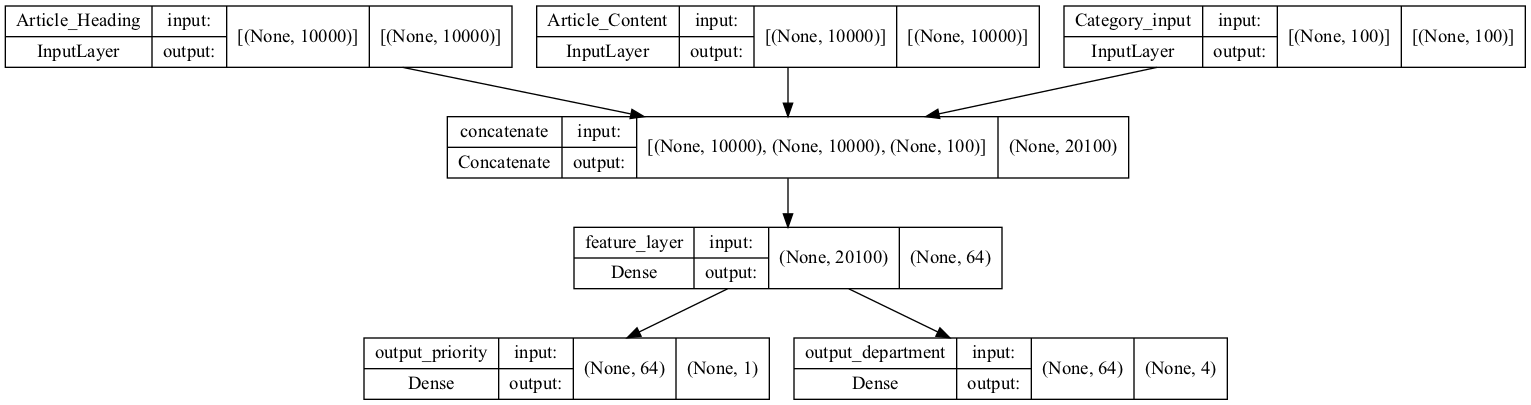

In [10]:
keras.utils.plot_model(model, "ticket_classifier.png", show_shapes=True)

We now have access to each of the layers. 

In [11]:
model.layers

In [12]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'Article_Heading')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'Article_Content')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'Category_input')>]

In [13]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

In [14]:
model.layers[4].input

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

In [15]:
model.layers[4].output

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'feature_layer')>

Now, saw we want to add one more output for the model. We could use the intermediate layers and perform feature extraction as follows. 

In [16]:
features = model.layers[4].output # Output of the Intermediate Dense, i.e representations in 64 dim space
dif = layers.Dense(3, activation = "softmax", name = "difficulty")(features)

new_model = keras.Model(inputs=[input_head, input_text, input_cat], outputs=[out_prio, out_dep, dif])

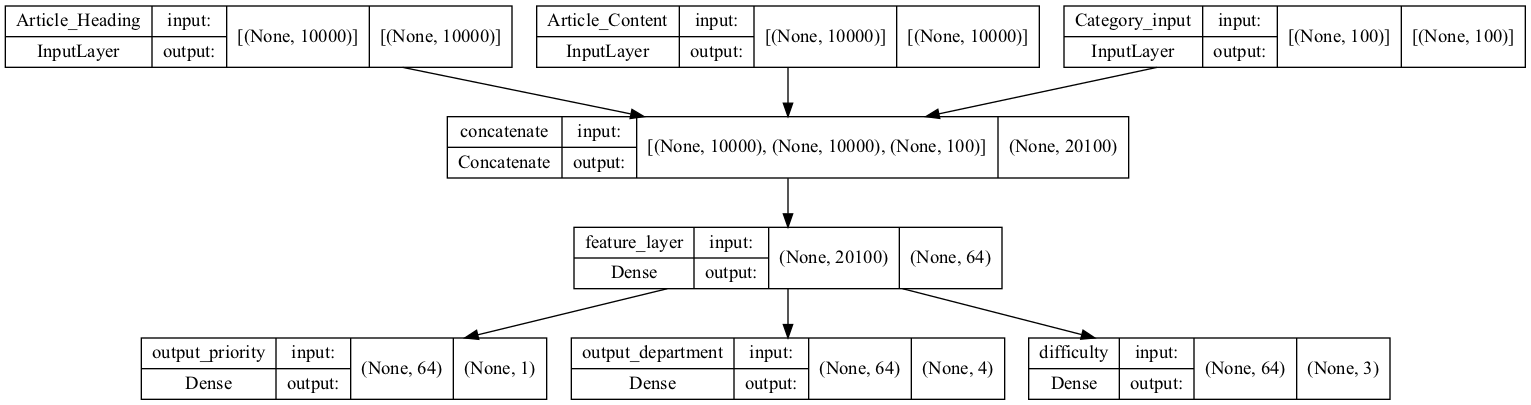

In [18]:
keras.utils.plot_model(new_model, "ticket_classifier_with_dif.png", show_shapes=True)

## Subclassing the model class

The last model-building pattern is the subclassing the model class. We follow the following structure:

1. In the __init__() method define the layers the model will use. 
2. In the call method define the forward pass. 
3. Instantiate subclass and call it on data. 

In [23]:
class CustomerTicket(keras.Model):
    
    def __init__(self, num_departments):
        
        super().__init__() # Call Constructor for parent class.
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation = "relu")
        self.priority_score = layers.Dense(1, activation = "sigmoid")
        self.department_classifier = layers.Dense(num_departments, activation = "softmax")
        
    def call(self, inputs):
        
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]
        
        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        
        priority = self.priority_score(features)
        department = self.department_classifier(features)
        
        return priority, department

In [24]:
model = CustomerTicket(num_departments=4)

In [25]:
model.weights

[]

In [27]:
import numpy as np 

In [28]:
num_samples = 1280

In [29]:
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

In [36]:
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

In [32]:
priority, department = model({"title":title_data, "text_body": text_body_data, "tags": tags_data})

In [35]:
model.compile(optimizer="rmsprop", loss=["mean_squared_error", "categorical_crossentropy"], metrics=[["mean_absolute_error"], ["accuracy"]])

In [37]:
model.fit({"title":title_data, "text_body": text_body_data, "tags": tags_data}, [priority_data, department_data], epochs = 1)

2022-05-15 23:26:57.046577: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-15 23:26:57.364624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 2s 12ms/step - loss: 29.1719 - output_1_loss: 0.3273 - output_2_loss: 28.8446 - output_1_mean_absolute_error: 0.4974 - output_2_accuracy: 0.2094


In [38]:
model.evaluate({"title":title_data, "text_body": text_body_data, "tags": tags_data}, [priority_data, department_data])

12/40 [========>.....................] - ETA: 0s - loss: 27.8903 - output_1_loss: 0.3186 - output_2_loss: 27.5716 - output_1_mean_absolute_error: 0.4902 - output_2_accuracy: 0.1172

2022-05-15 23:27:20.934068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 1s 10ms/step - loss: 26.5101 - output_1_loss: 0.3270 - output_2_loss: 26.1831 - output_1_mean_absolute_error: 0.4970 - output_2_accuracy: 0.1289


[26.510099411010742,
 0.32700100541114807,
 26.1830997467041,
 0.4970439374446869,
 0.12890625]

In [39]:
model.metrics_names

['loss',
 'output_1_loss',
 'output_2_loss',
 'output_1_mean_absolute_error',
 'output_2_accuracy']

In [40]:
priority_preds, department_preds = model.predict({"title":title_data, "text_body": text_body_data, "tags": tags_data})

2022-05-15 23:30:43.847363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [42]:
department_preds

array([[8.8033274e-05, 1.3331579e-12, 9.9991179e-01, 6.8869355e-08],
       [7.6196644e-05, 2.7967784e-12, 9.9992371e-01, 1.3639738e-07],
       [5.8494388e-05, 4.0502766e-12, 9.9994123e-01, 2.1414223e-07],
       ...,
       [4.4737724e-05, 6.8202112e-13, 9.9995518e-01, 6.2148843e-08],
       [7.2334846e-04, 5.9918038e-12, 9.9927646e-01, 2.6231001e-07],
       [9.7466829e-05, 1.0164325e-12, 9.9990213e-01, 3.2456762e-07]],
      dtype=float32)

## Mixing and Matching different components

We can also mix multiple ways of defining the model class. For example we could:

1. Use subclassed layer in a Functional model definition.
2. Use a Functional defined layer in a Subclassed model definition. 

In [45]:
class Classifier(keras.Model):
    
    def __init__(self, num_classes=2):
        
        super().__init__()
        
        if num_classes == 2:
            
            num_units = 1
            activation = "sigmoid"
        
        else:
            num_units = num_classes
            activation = "softmax"
            
        self.dense = layers.Dense(num_units, activation = activation)
        
    def call(self, inputs):
        
        return self.dense(inputs)

In [46]:
inputs = keras.Input(shape=(3, ))
features = layers.Dense(64, activation = "relu")(inputs)
outputs = Classifier(num_classes =10)(features)

binary_classifier = keras.Model(inputs = inputs, outputs = outputs)

In [47]:
binary_classifier.weights

[<tf.Variable 'dense_6/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.1428327 , -0.1607272 , -0.11754532, -0.1787154 ,  0.28282177,
          0.08839911,  0.00579512, -0.08372486, -0.03816238,  0.22776496,
          0.13838577, -0.15857337,  0.26835746, -0.0816475 ,  0.20146245,
         -0.22499362, -0.09306201, -0.16244468, -0.12786451, -0.16093262,
          0.15748945,  0.05618376,  0.06940013, -0.11883357,  0.14740229,
         -0.17412817,  0.00380516,  0.26519787, -0.14521115,  0.06280428,
          0.19198194, -0.26235005, -0.16639526, -0.25091428, -0.09507737,
         -0.13819982, -0.12141149, -0.22343254, -0.185904  ,  0.19043213,
          0.06033608,  0.07758954, -0.25916046, -0.06376384, -0.24408184,
         -0.26065472,  0.27369416, -0.07861088,  0.2778231 ,  0.1610808 ,
         -0.00929877,  0.2925262 ,  0.2427206 ,  0.06952772, -0.18184611,
          0.04380918, -0.02508733, -0.09938404,  0.1970273 ,  0.19373724,
          0.15792274,  0.23032242,  0.02216

2. Use a Functional defined layer in a Subclassed model definition.

In [54]:
inputs = keras.Input(shape = (64,))
outputs = layers.Dense(1, activation = "sigmoid")(inputs)
binary_classifier = keras.Model(inputs = inputs, outputs = outputs)

In [57]:
class MyModel(keras.Model):
    
    def __init__(self):
        
        super().__init__()
        self.dense = layers.Dense(64, activation = "relu")
        self.classifier = binary_classifier
        
    def call(self, inputs):
        
        features = self.dense(inputs)
        return self.classifier(features)

In [58]:
model = MyModel()

AttributeError: 'list' object has no attribute 'shape'

## Using built in training and evaluation loops

## Looking at the standard workflow

In [1]:
from tensorflow.keras.datasets import mnist

In [3]:
from tensorflow import keras
from keras import layers

#### Create a model for our dataset.

Define the model in a function and return the model as the output for the function.

In [4]:
def get_mnist_model():
    
    inputs = keras.Input(shape=(28*28,))
    features = layers.Dense(512, activation="relu")(inputs)
    outputs = layers.Dense(10, activation = "softmax")(features)
    model = keras.Model(inputs = inputs, outputs = outputs)\
    
    return model 



In [10]:
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28*28)).astype("float32")/255
test_images = test_images.reshape((test_images.shape[0], 28*28)).astype("float32")/255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

In [6]:
model = get_mnist_model()
model.compile(optimizer = "rmsprop", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

Metal device set to: Apple M1 Pro


2022-05-19 12:47:20.399290: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-19 12:47:20.399649: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
model.fit(train_images, train_labels, epochs = 5, validation_data=(val_images, val_labels))

Epoch 1/5


2022-05-19 12:47:52.124585: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-19 12:47:52.298247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 0.2193 - accuracy: 0.9357

2022-05-19 12:48:02.359047: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 11s 7ms/step - loss: 0.2193 - accuracy: 0.9357 - val_loss: 0.1260 - val_accuracy: 0.9652
Epoch 2/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0959 - accuracy: 0.9727 - val_loss: 0.0899 - val_accuracy: 0.9757
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0669 - accuracy: 0.9799 - val_loss: 0.0954 - val_accuracy: 0.9746
Epoch 4/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0521 - accuracy: 0.9853 - val_loss: 0.0856 - val_accuracy: 0.9784
Epoch 5/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0408 - accuracy: 0.9886 - val_loss: 0.0980 - val_accuracy: 0.9781


In [11]:
test_metrics = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0890 - accuracy: 0.9776


In [12]:
predictions = model.predict(test_images)

2022-05-19 12:51:40.394490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


### Writing your own metrics

In [13]:
import tensorflow as tf

In [24]:
class RootMeanSquaredError(keras.metrics.Metric):
    
    def __init__(self, name = "rmse", **kwargs):
        
        super().__init__(name = name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(name="total_samples", initializer="zeros", dtype = "int32")
        
    def update_state(self, y_true, y_pred, sample_weight=None):
        
        y_true = tf.one_hot(y_true, depth = tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)
        
    def result(self):
        return tf.sqrt(self.mse_sum/tf.cast(self.total_samples, tf.float32))
    
    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [25]:
model = get_mnist_model()
model.compile(optimizer = "rmsprop", loss = "sparse_categorical_crossentropy", metrics=["accuracy", RootMeanSquaredError()])

In [26]:
model.fit(train_images, train_labels, epochs = 5, validation_data=(val_images, val_labels))

Epoch 1/5
  16/1563 [..............................] - ETA: 11s - loss: 1.2699 - accuracy: 0.6113 - rmse: 5.9340

2022-05-19 15:32:57.968805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 0.2177 - accuracy: 0.9360 - rmse: 7.2418

2022-05-19 15:33:08.624571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 12s 8ms/step - loss: 0.2177 - accuracy: 0.9360 - rmse: 7.2418 - val_loss: 0.1295 - val_accuracy: 0.9616 - val_rmse: 7.3643
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0975 - accuracy: 0.9712 - rmse: 7.3877 - val_loss: 0.1074 - val_accuracy: 0.9705 - val_rmse: 7.4082
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0692 - accuracy: 0.9800 - rmse: 7.4202 - val_loss: 0.0930 - val_accuracy: 0.9748 - val_rmse: 7.4220
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0545 - accuracy: 0.9848 - rmse: 7.4304 - val_loss: 0.1046 - val_accuracy: 0.9731 - val_rmse: 7.4329
Epoch 5/5
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0418 - accuracy: 0.9882 - rmse: 7.4378 - val_loss: 0.1001 - val_accuracy: 0.9751 - val_rmse: 7.4388


## Using Callbacks on Keras

### EarlyStopping and ModelCheckpoints callaback

In [27]:
callbacks_list = [keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2), 
                keras.callbacks.ModelCheckpoint(filepath="./", monitor = "val_loss", save_best_only = True)]

In [28]:
model = get_mnist_model()
model.compile(optimizer = "rmsprop", loss = "sparse_categorical_crossentropy", metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels, epochs = 5, validation_data=(val_images, val_labels), callbacks=callbacks_list)

Epoch 1/5
   8/1563 [..............................] - ETA: 11s - loss: 1.6096 - accuracy: 0.4727 - rmse: 5.6922  

2022-05-19 16:37:04.776247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 0.2167 - accuracy: 0.9354 - rmse: 7.2410

2022-05-19 16:37:15.686167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: ./assets


2022-05-19 16:37:17.341369: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


1563/1563 [==============================] - 13s 8ms/step - loss: 0.2167 - accuracy: 0.9354 - rmse: 7.2410 - val_loss: 0.1411 - val_accuracy: 0.9583 - val_rmse: 7.3588
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0945 - accuracy: 0.9727 - rmse: 7.3898 - val_loss: 0.1137 - val_accuracy: 0.9672 - val_rmse: 7.4034
Epoch 3/5
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0695 - accuracy: 0.9808 - rmse: 7.4186 - val_loss: 0.0952 - val_accuracy: 0.9763 - val_rmse: 7.4305
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0521 - accuracy: 0.9850 - rmse: 7.4363 - val_loss: 0.1274 - val_accuracy: 0.9694 - val_rmse: 7.4231
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0421 - accuracy: 0.9881 - rmse: 7.4393 - val_loss: 0.0887 - val_accuracy: 0.9785 - val_rmse: 7.4452


### Writing your own callbacks

In [29]:
from matplotlib import pyplot as plt 

In [32]:
class LossHistory(keras.callbacks.Callback):
    
    def on_train_begin(self, logs):
        self.per_batch_loss = []
        
    def on_batch_end(self, batch, logs):
        
        self.per_batch_loss.append(logs.get("loss"))
        
    def on_epoch_end(self, epoch, logs):
        
        plt.clf()
        plt.plot(range(len(self.per_batch_loss)), self.per_batch_loss, label = "Training loss for each batch")
        plt.xlabel("Batch (epoch {})".format(epoch))
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"./images/per_batch_loss_plots/plot_at_epoch_{epoch}")
        self.per_batch_loss=[]

Epoch 1/5
  17/1563 [..............................] - ETA: 10s - loss: 1.2136 - accuracy: 0.6452

2022-05-19 17:05:14.285615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1561/1563 [============================>.] - ETA: 0s - loss: 0.2213 - accuracy: 0.9340

2022-05-19 17:05:24.446325: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 12s 7ms/step - loss: 0.2211 - accuracy: 0.9340 - val_loss: 0.1324 - val_accuracy: 0.9603
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0953 - accuracy: 0.9720 - val_loss: 0.1092 - val_accuracy: 0.9702
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0692 - accuracy: 0.9804 - val_loss: 0.0915 - val_accuracy: 0.9768
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0518 - accuracy: 0.9854 - val_loss: 0.0961 - val_accuracy: 0.9759
Epoch 5/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0402 - accuracy: 0.9886 - val_loss: 0.1291 - val_accuracy: 0.9694


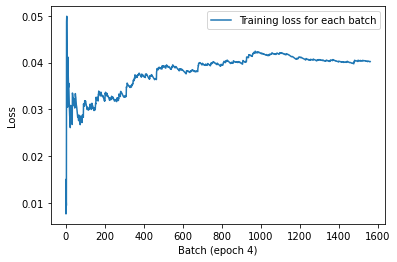

In [33]:
model = get_mnist_model()
model.compile(optimizer = "rmsprop", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images, train_labels, epochs = 5, validation_data=(val_images, val_labels), callbacks=LossHistory())

### Monitoring and Visualizing with Tensorboard

In [34]:
model = get_mnist_model()
model.compile(optimizer = "rmsprop", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(log_dir = "./logs/")
model.fit(train_images, train_labels, epochs = 5, validation_data=(val_images, val_labels), callbacks=tensorboard)

Epoch 1/5
   7/1563 [..............................] - ETA: 13s - loss: 1.7659 - accuracy: 0.4821 

2022-05-19 17:11:12.438490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 0.2191 - accuracy: 0.9353

2022-05-19 17:11:21.947460: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 11s 7ms/step - loss: 0.2191 - accuracy: 0.9353 - val_loss: 0.1289 - val_accuracy: 0.9625
Epoch 2/5
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0976 - accuracy: 0.9719 - val_loss: 0.1047 - val_accuracy: 0.9704
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0691 - accuracy: 0.9806 - val_loss: 0.1002 - val_accuracy: 0.9710
Epoch 4/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0520 - accuracy: 0.9853 - val_loss: 0.0973 - val_accuracy: 0.9750
Epoch 5/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0421 - accuracy: 0.9881 - val_loss: 0.0903 - val_accuracy: 0.9785


## Writing Custom Training Loops

In [36]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

In [60]:
def training_step(inputs, targets):
    
    with tf.GradientTape() as tape:
        
        outputs = model(inputs, training = True)
        loss = loss_fn(targets, outputs)
        
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    
    logs = {}
    
    for metric in metrics:
        metric.update_state(targets, outputs)
        logs[metric.name] = metric.result()
    
    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    
    return logs

In [61]:
def reset_metrics():
    
    for metric in metrics:
        metric.reset_state()
        
    loss_tracking_metric.reset_state()

In [62]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3

for epoch in range(epochs):
    
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = training_step(inputs_batch, targets_batch)
    print(f"Results at the end of epoch {epoch}")
    
    for key, values in logs.items():
        print(f"....{key}: {values: .4f}")

Results at the end of epoch 0
....sparse_categorical_accuracy:  0.9970
....loss:  0.0138
Results at the end of epoch 1
....sparse_categorical_accuracy:  0.9973
....loss:  0.0106
Results at the end of epoch 2
....sparse_categorical_accuracy:  0.9979
....loss:  0.0091


In [55]:
len(training_dataset)

1563

In [56]:
len(train_images)

50000

In [57]:
50000/32

1562.5

In [82]:
# Evaluation loop 
@tf.function
def test_step(inputs, targets):
    
    outputs = model(inputs, training = False)
    loss = loss_fn(targets, outputs)
    
    logs = {}
    
    for metric in metrics:
        metric.update_state(targets, outputs)
        logs["val_" + metric.name] = metric.result()
        
    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    
    return logs

In [77]:
import time 

In [81]:
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()

st_time = time.time()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)

print("Evaluation Results:")
for key, values in logs.items():
    print(f"....{key}: {values: .4f}")
    
print(f"Time Taken is : {time.time() - st_time}")

Evaluation Results:
....val_sparse_categorical_accuracy:  0.9750
....val_loss:  0.1640
Time Taken is : 1.8105101585388184


### Making it faster with tf.function()

In [79]:
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()

st_time = time.time()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)

print("Evaluation Results:")
for key, values in logs.items():
    print(f"....{key}: {values: .4f}")
    
print(f"Time Taken is : {time.time() - st_time}")

Evaluation Results:
....val_sparse_categorical_accuracy:  0.9750
....val_loss:  0.1640
Time Taken is : 0.7355661392211914


### Leveraging a custom training loop with fit()

In [94]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_metric = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    
    def train_step(self, data):
        
        inputs, targets = data
        
        with tf.GradientTape() as tape:
            output = model(inputs, training = True)
            loss = loss_fn(targets, output)
            
        gradient = tape.gradient(loss, model.trainable_weights)
        optimizer.apply_gradients(zip(gradient, model.trainable_weights))
        
        loss_metric.update_state(loss)
        return {"loss": loss_metric.result()}
    
    @property
    def metrics(self):
        return [loss_metric]

In [99]:
inputs = keras.Input(shape=(28*28, ))
features = layers.Dense(512, activation = "relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation = "softmax")(features)

model = CustomModel(inputs = inputs, outputs = outputs)

In [96]:
model.compile(optimizer = keras.optimizers.RMSprop())
model.fit(train_images, train_labels,epochs = 3, batch_size = 32)

Epoch 1/3
  10/1563 [..............................] - ETA: 8s - loss: 1.7171  

2022-05-19 18:49:38.047846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 8s 5ms/step - loss: 0.2940
Epoch 2/3
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1645
Epoch 3/3
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1398


In [104]:
# With metrics 

class CustomModel(keras.Model):
    
    def train_step(self, data):
        
        inputs, targets = data
        
        with tf.GradientTape() as tape:
            output = model(inputs, training = True)
            loss = loss_fn(targets, output)
            
        gradient = tape.gradient(loss, model.trainable_weights)
        optimizer.apply_gradients(zip(gradient, model.trainable_weights))
        self.compiled_metrics.update_state(targets, output)
        return {m.name:m.result() for m in self.metrics}
            


In [ ]:
inputs = keras.Input(shape=(28*28, ))
features = layers.Dense(512, activation = "relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation = "softmax")(features)

model = CustomModel(inputs = inputs, outputs = outputs)

model.compile(optimizer = keras.optimizers.RMSprop(), loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics= [keras.metrics.SparseCategoricalAccuracy()])

model.fit(train_images, train_labels,epochs = 3)

Epoch 1/3
   9/1563 [..............................] - ETA: 10s - sparse_categorical_accuracy: 0.4965 

2022-05-19 18:55:36.520776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 9s 5ms/step - sparse_categorical_accuracy: 0.9109
Epoch 2/3
 261/1563 [====>.........................] - ETA: 6s - sparse_categorical_accuracy: 0.9514